In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Bài toán nhóm cần giải quyết là dự đoán `humidity` của ngày hôm sau dựa vào dữ liệu của các ngày hôm trước  
Mô hình nhóm chọn là: `Linear Regression`  
Phương pháp đánh giá nhóm chọn là: `mean_absolute_error`

## 1. Import các thư viện cần thiết

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression

## 2. Load data

In [4]:
data_df = pd.read_csv('Data/weather.csv')
data_df

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
0,1262304000,73.45,75.07,72.69,0.97,1010.3,6.72,71.0,0.50,0.0,NaN
1,1262390400,71.67,72.95,69.81,0.94,1011.0,2.29,41.0,0.44,0.0,4.974
2,1262476800,75.25,76.89,73.39,0.94,1011.6,1.16,30.0,0.75,0.0,4.346
3,1262563200,75.25,76.64,71.61,0.88,1010.9,3.46,71.0,0.75,0.0,6.216
4,1262649600,75.25,76.89,73.39,0.94,1010.1,6.91,120.0,0.44,0.0,6.216
...,...,...,...,...,...,...,...,...,...,...,...
725,1324944000,71.67,72.95,69.81,0.94,1012.0,4.61,0.0,0.75,0.0,5.591
726,1325030400,73.45,75.18,73.39,1.00,1013.7,4.61,11.0,0.75,0.0,3.108
727,1325116800,71.67,72.44,66.21,0.83,1012.8,2.29,11.0,0.44,0.0,6.216
728,1325203200,73.45,74.65,69.81,0.88,1012.4,4.61,0.0,0.44,0.0,6.216


** Visualize cột humidity **

In [5]:
data_df.humidity.describe()

count    730.000000
mean       0.911233
std        0.083330
min        0.610000
25%        0.840000
50%        0.940000
75%        1.000000
max        1.000000
Name: humidity, dtype: float64

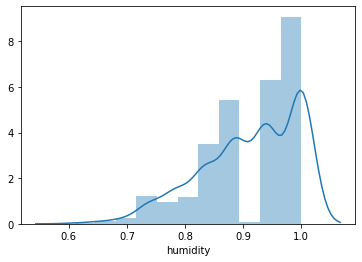

In [6]:
sns.distplot(data_df.humidity)

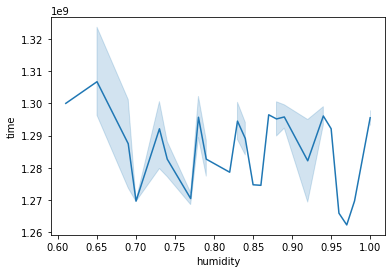

In [7]:
sns.lineplot(data_df.humidity, data_df.time)

## 3. Tách data thành ba tập train, test và validation với tỉ lệ 6:2:2



In [8]:
# Lấy output và chỉ lấy 729 phần tử sau
y_data = data_df["humidity"].copy()
y_data = y_data[1:]
y_data

1      0.94
2      0.94
3      0.88
4      0.94
5      0.88
       ... 
725    0.94
726    1.00
727    0.83
728    0.88
729    0.94
Name: humidity, Length: 729, dtype: float64

In [9]:
# Xóa dòng cuối cùng trong data_df vì dòng này không có output
X_data = data_df.drop(index=729).copy()
X_data

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
0,1262304000,73.45,75.07,72.69,0.97,1010.3,6.72,71.0,0.50,0.0,NaN
1,1262390400,71.67,72.95,69.81,0.94,1011.0,2.29,41.0,0.44,0.0,4.974
2,1262476800,75.25,76.89,73.39,0.94,1011.6,1.16,30.0,0.75,0.0,4.346
3,1262563200,75.25,76.64,71.61,0.88,1010.9,3.46,71.0,0.75,0.0,6.216
4,1262649600,75.25,76.89,73.39,0.94,1010.1,6.91,120.0,0.44,0.0,6.216
...,...,...,...,...,...,...,...,...,...,...,...
724,1324857600,66.27,66.48,60.80,0.83,1013.5,5.74,350.0,0.44,0.0,5.591
725,1324944000,71.67,72.95,69.81,0.94,1012.0,4.61,0.0,0.75,0.0,5.591
726,1325030400,73.45,75.18,73.39,1.00,1013.7,4.61,11.0,0.75,0.0,3.108
727,1325116800,71.67,72.44,66.21,0.83,1012.8,2.29,11.0,0.44,0.0,6.216


In [10]:
# Tách dữ liệu thành 3 tập train : test : validation = 6:2:2
seed = 123
X_data_temp, X_data_val, y_data_temp, y_data_val = train_test_split(X_data, y_data, test_size=0.2, random_state=seed)
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data_temp, y_data_temp, test_size=0.25, random_state=seed)
print(len(X_data_train), len(y_data_train))
print(len(X_data_val), len(y_data_val))
print(len(X_data_test), len(y_data_test))

437 437
146 146
146 146


## 4. Tiền xử lý dữ liệu

In [11]:
X_data_train

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
175,1277424000,80.65,87.67,76.99,0.89,1007.2,5.74,230.0,0.19,1.0,6.216
101,1271030400,82.48,89.61,75.19,0.79,1009.3,5.74,180.0,0.44,1.0,6.216
364,1293753600,73.45,74.91,71.61,0.94,1009.6,2.29,11.0,0.75,0.0,4.974
572,1311724800,77.06,79.15,76.99,1.00,1007.8,6.91,240.0,0.75,1.0,4.346
456,1301702400,78.88,82.18,73.39,0.83,1009.3,2.29,270.0,0.75,1.0,3.108
...,...,...,...,...,...,...,...,...,...,...,...
15,1263600000,69.87,70.21,62.59,0.78,1015.6,5.74,11.0,0.75,0.0,6.216
672,1320364800,75.25,77.17,75.19,1.00,1008.4,4.61,350.0,0.19,1.0,6.216
556,1310342400,78.88,82.55,75.19,0.89,1005.7,2.24,NaN,0.75,1.0,6.216
337,1291420800,73.45,74.65,69.81,0.88,1007.4,6.91,0.0,0.75,0.0,6.216


In [12]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        tp = X_df.copy()
        time = pd.to_datetime(tp['time'], unit='s')
        day_sr = time.dt.day
        month_sr = time.dt.month
        tp.drop(labels=["visibility", "apparentTemperature", "time"], axis=1, inplace=True)
        tp['day'] = pd.Series(day_sr, index=tp.index)
        tp['month'] = pd.Series(month_sr, index=tp.index) 
        return tp

In [13]:
CAD = ColAdderDropper()
tp = CAD.transform(X_data_train)
tp

,temperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,day,month
175,80.65,76.99,0.89,1007.2,5.74,230.0,0.19,1.0,25,6
101,82.48,75.19,0.79,1009.3,5.74,180.0,0.44,1.0,12,4
364,73.45,71.61,0.94,1009.6,2.29,11.0,0.75,0.0,31,12
572,77.06,76.99,1.00,1007.8,6.91,240.0,0.75,1.0,27,7
456,78.88,73.39,0.83,1009.3,2.29,270.0,0.75,1.0,2,4
...,...,...,...,...,...,...,...,...,...,...
15,69.87,62.59,0.78,1015.6,5.74,11.0,0.75,0.0,16,1
672,75.25,75.19,1.00,1008.4,4.61,350.0,0.19,1.0,4,11
556,78.88,75.19,0.89,1005.7,2.24,NaN,0.75,1.0,11,7
337,73.45,69.81,0.88,1007.4,6.91,0.0,0.75,0.0,4,12


## 5. Tạo pipeline để huấn luyện model

### a. Phương pháp 1
Ở phương pháp này, nhóm sẽ tách cột `time` thành 2 cột là `day` và `month`. Nhóm sẽ bỏ cột `time`,`apparentTemperature` và `visibility` . Nhưng feature có giá trị thiếu sẽ thử lần lượt các phương pháp `mean`, `median`, `most_frequent`. Sau đó, nhóm sẽ thử sử dụng `PCA` với `n_components` chạy từ `[1: số lượng cột]`

In [14]:
num_col = ['temperature', 'dewPoint','humidity','pressure','windSpeed','windBearing','cloudCover','uvIndex','day','month']
len(num_col)

10

In [15]:
pca_seed = 321
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)
method_1 = Pipeline(
    steps=[
        ('CAD', ColAdderDropper()),
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [16]:
imp_method = ['mean', 'median', 'most_frequent']
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in range(len(num_col)):
        method_1.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j + 1)
        model = method_1.fit(X_data_train, y_data_train)
        train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
        val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [17]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.06203728066314143
mean
1


** Nhận xét **  
Nhóm sử dụng độ lỗi `mean_absolute_error` và kết quả tốt nhất mô hình trả về là **0.06**. Theo nhóm đánh giá thì phương pháp 1 này không có độ chính xác cao vì theo như dữ liệu gốc ban đầu: `humidity` có `std` vào khoảng **0.08** mà độ lỗi của mô hình dự đoán có `std` là **0.06** (khá gần với **0.08**)  
** Kế hoạch**  
Nhóm sẽ thực hiện phương pháp 2. Lần này, nhóm sẽ giữ nguyên toàn bộ các đặc trưng ban đầu, không thêm hay xóa bất kỳ cột nào. Quy trình làm vẫn tương tự như phương pháp 1 để xem kết quả có cải thiện hơn hay không

### b. Phương pháp 2
Ở phương pháp này, nhóm sẽ giữ nguyên toàn bộ các đặc trưng ban đầu, không thêm hay xóa bất kỳ cột nào. Quy trình làm vẫn tương tự như phương pháp 1 để xem kết quả có cải thiện hơn hay không

In [18]:
X_data_train

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
175,1277424000,80.65,87.67,76.99,0.89,1007.2,5.74,230.0,0.19,1.0,6.216
101,1271030400,82.48,89.61,75.19,0.79,1009.3,5.74,180.0,0.44,1.0,6.216
364,1293753600,73.45,74.91,71.61,0.94,1009.6,2.29,11.0,0.75,0.0,4.974
572,1311724800,77.06,79.15,76.99,1.00,1007.8,6.91,240.0,0.75,1.0,4.346
456,1301702400,78.88,82.18,73.39,0.83,1009.3,2.29,270.0,0.75,1.0,3.108
...,...,...,...,...,...,...,...,...,...,...,...
15,1263600000,69.87,70.21,62.59,0.78,1015.6,5.74,11.0,0.75,0.0,6.216
672,1320364800,75.25,77.17,75.19,1.00,1008.4,4.61,350.0,0.19,1.0,6.216
556,1310342400,78.88,82.55,75.19,0.89,1005.7,2.24,NaN,0.75,1.0,6.216
337,1291420800,73.45,74.65,69.81,0.88,1007.4,6.91,0.0,0.75,0.0,6.216


In [19]:
num_col = ['time', 'temperature', 'apparentTemperature', 'dewPoint','humidity','pressure','windSpeed','windBearing','cloudCover','uvIndex','visibility']
len(num_col)

11

In [20]:
pca_seed = 321
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)
method_2 = Pipeline(
    steps=[
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [21]:
imp_method = ['mean', 'median', 'most_frequent']
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in range(len(num_col)):
        method_2.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j + 1)
        model = method_2.fit(X_data_train, y_data_train)
        train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
        val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [22]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.065328150539786
most_frequent
1


### c. Phương pháp 3
Ở phương pháp này, nhóm sẽ lựa chọn đặc tính bằng phương pháp Pearson's Correlation

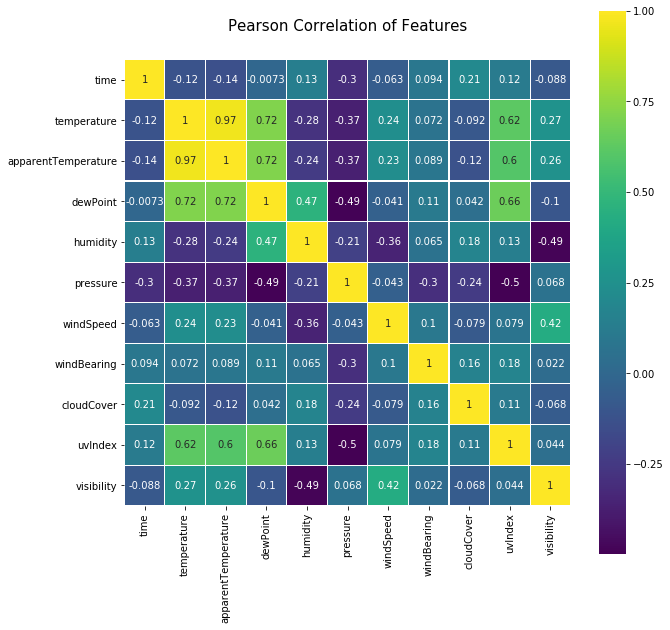

In [23]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

- 1 có nghĩa là chúng có tương quan cao
- 0 có nghĩa là không có tương quan
- -1 có nghĩa là có một mối tương quan nghịch như là một tỷ lệ nghịch.
- Do đó chúng ta sẽ bỏ đi những đặc trưng có mối tương quan thấp với humidity

In [24]:
class ColDropperPearsonCorrelation(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        tp = X_df.copy()
        tp.drop(labels=["time", "windBearing", "cloudCover", "uvIndex"], axis=1, inplace=True)
        return tp

In [25]:
CD = ColDropperPearsonCorrelation()
tp = CD.transform(X_data_train)
tp

,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,visibility
175,80.65,87.67,76.99,0.89,1007.2,5.74,6.216
101,82.48,89.61,75.19,0.79,1009.3,5.74,6.216
364,73.45,74.91,71.61,0.94,1009.6,2.29,4.974
572,77.06,79.15,76.99,1.00,1007.8,6.91,4.346
456,78.88,82.18,73.39,0.83,1009.3,2.29,3.108
...,...,...,...,...,...,...,...
15,69.87,70.21,62.59,0.78,1015.6,5.74,6.216
672,75.25,77.17,75.19,1.00,1008.4,4.61,6.216
556,78.88,82.55,75.19,0.89,1005.7,2.24,6.216
337,73.45,74.65,69.81,0.88,1007.4,6.91,6.216


In [26]:
num_col = ['temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'visibility']
len(num_col)

7

In [27]:
pca_seed = 321
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)
method_3 = Pipeline(
    steps=[
        ('CDPC', ColDropperPearsonCorrelation()),
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [28]:
imp_method = ['mean', 'median', 'most_frequent']
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in range(len(num_col)):
        method_3.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j + 1)
        model = method_3.fit(X_data_train, y_data_train)
        train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
        val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [29]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.06529806559873233
mean
1


### d. Phương pháp 4
Ở phương pháp này, nhóm sẽ lựa chọn đặc tính bằng phương pháp SelectKBest

In [30]:
temp_df = data_df.copy()
temp_df = temp_df[['time', 'temperature', 'apparentTemperature', 'dewPoint', 'pressure', 'windSpeed', 'windBearing', 'cloudCover', 'uvIndex', 'visibility', 'humidity']]
temp_df = temp_df.fillna(temp_df.mean())
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
time                   730 non-null int64
temperature            730 non-null float64
apparentTemperature    730 non-null float64
dewPoint               730 non-null float64
pressure               730 non-null float64
windSpeed              730 non-null float64
windBearing            730 non-null float64
cloudCover             730 non-null float64
uvIndex                730 non-null float64
visibility             730 non-null float64
humidity               730 non-null float64
dtypes: float64(10), int64(1)
memory usage: 62.9 KB


In [31]:
array = temp_df.values
X = array[:,0:10]
Y = array[:,10]
Y = Y.astype('int')

test = SelectKBest(f_regression, k=5)
fit = test.fit(X,Y)
np.set_printoptions(precision=3) 

print(fit.scores_)
print() 

for i in range(len(temp_df.columns) - 1):
    print(str(temp_df.columns[i]) + ": "  + str(fit.scores_[i]))

[3.034e+00 5.845e+01 6.084e+01 5.038e+01 1.066e+01 5.440e+01 2.116e-01
 2.201e+01 6.355e+00 2.342e+02]

time: 3.033550878713632
temperature: 58.45496004407272
apparentTemperature: 60.83930295184551
dewPoint: 50.375562168457755
pressure: 10.656494314278723
windSpeed: 54.40052241589659
windBearing: 0.21164865542069794
cloudCover: 22.00641506548273
uvIndex: 6.354606736242322
visibility: 234.17316778418115


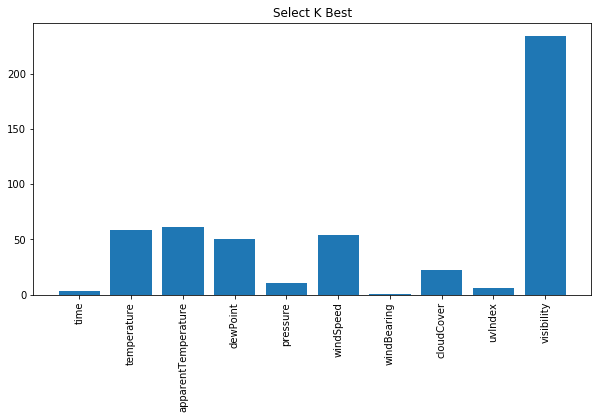

In [32]:
columns = temp_df[:-1]
features_selection = fit.scores_
plt.figure(figsize=(10,5))
plt.title("Select K Best")
y_pos = np.arange(len(temp_df.columns)-1)
plt.bar(y_pos, features_selection, align='center')
plt.xticks(y_pos, columns, rotation=90)
plt.show()

- Ta chọn ra 5 đặc trưng tốt nhất là "temperature", "apparentTemperature", "dewPoint", "windSpeed", "visibility"

In [33]:
class ColDropperK(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        tp = X_df.copy()
        tp.drop(labels=["time", "pressure", "cloudCover", "uvIndex", "windBearing"], axis=1, inplace=True)
        return tp

In [34]:
CD = ColDropperK()
tp = CD.transform(X_data_train)
tp

,temperature,apparentTemperature,dewPoint,humidity,windSpeed,visibility
175,80.65,87.67,76.99,0.89,5.74,6.216
101,82.48,89.61,75.19,0.79,5.74,6.216
364,73.45,74.91,71.61,0.94,2.29,4.974
572,77.06,79.15,76.99,1.00,6.91,4.346
456,78.88,82.18,73.39,0.83,2.29,3.108
...,...,...,...,...,...,...
15,69.87,70.21,62.59,0.78,5.74,6.216
672,75.25,77.17,75.19,1.00,4.61,6.216
556,78.88,82.55,75.19,0.89,2.24,6.216
337,73.45,74.65,69.81,0.88,6.91,6.216


In [35]:
num_col = ['temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed', 'visibility']
len(num_col)

6

In [36]:
pca_seed = 321
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)
method_4 = Pipeline(
    steps=[
        ('CDK', ColDropperK()),
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [37]:
imp_method = ['mean', 'median', 'most_frequent']
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in range(len(num_col)):
        method_4.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j + 1)
        model = method_4.fit(X_data_train, y_data_train)
        train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
        val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [38]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.06549637174136479
mean
1


### e. Phương pháp 5
Ở phương pháp này, nhóm sẽ lựa chọn đặc tính bằng phương pháp Feature Importance

In [39]:
array = temp_df.values
X = array[:,0:10]
Y = array[:,10]
Y = Y.astype('int')

model = ExtraTreesClassifier()
model.fit(X,Y)
for i in range(len(temp_df.columns)-1):
    print(str(temp_df.columns[i]) + ": "  + str(model.feature_importances_[i]))

time: 0.059651322272312735
temperature: 0.16928232426716414
apparentTemperature: 0.22527534000992117
dewPoint: 0.22435235871602924
pressure: 0.04447359969524395
windSpeed: 0.04166360944225314
windBearing: 0.036938271590804435
cloudCover: 0.025745844351258786
uvIndex: 0.029141505584157776
visibility: 0.14347582407085469


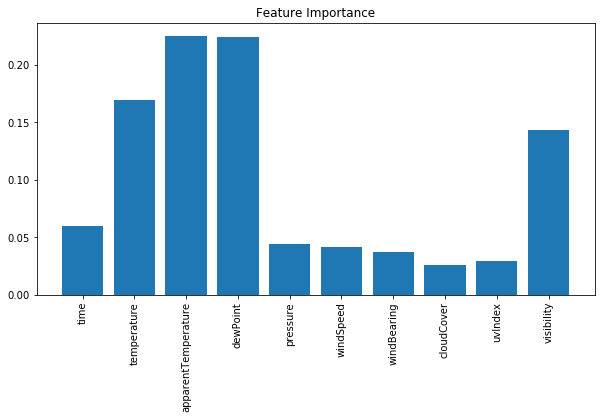

In [40]:
columns = temp_df[:-1]
features_selection = model.feature_importances_
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
y_pos = np.arange(len(temp_df.columns)-1)
plt.bar(y_pos, features_selection, align='center')
plt.xticks(y_pos, columns, rotation=90)
plt.show()

- Ta chọn ra 5 đặc trưng tốt nhất là "time", "temperature", "apparentTemperature", "dewPoint", "visibility"

In [41]:
class ColDropperFI(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        tp = X_df.copy()
        tp.drop(labels=["pressure", "windSpeed", "cloudCover", "uvIndex", "windBearing"], axis=1, inplace=True)
        return tp

In [42]:
CD = ColDropperFI()
tp = CD.transform(X_data_train)
tp

,time,temperature,apparentTemperature,dewPoint,humidity,visibility
175,1277424000,80.65,87.67,76.99,0.89,6.216
101,1271030400,82.48,89.61,75.19,0.79,6.216
364,1293753600,73.45,74.91,71.61,0.94,4.974
572,1311724800,77.06,79.15,76.99,1.00,4.346
456,1301702400,78.88,82.18,73.39,0.83,3.108
...,...,...,...,...,...,...
15,1263600000,69.87,70.21,62.59,0.78,6.216
672,1320364800,75.25,77.17,75.19,1.00,6.216
556,1310342400,78.88,82.55,75.19,0.89,6.216
337,1291420800,73.45,74.65,69.81,0.88,6.216


In [43]:
num_col = ['time', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'visibility']
len(num_col)

6

In [44]:
pca_seed = 321
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)
method_5 = Pipeline(
    steps=[
        ('CDFI', ColDropperFI()),
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [45]:
imp_method = ['mean', 'median', 'most_frequent']
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in range(len(num_col)):
        method_5.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j + 1)
        model = method_5.fit(X_data_train, y_data_train)
        train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
        val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [46]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.06534328347038712
mean
1


### f. Phương pháp 6
Ở phương pháp này, nhóm sẽ lựa chọn mô hình Neural Network

In [47]:
X_data_train

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
175,1277424000,80.65,87.67,76.99,0.89,1007.2,5.74,230.0,0.19,1.0,6.216
101,1271030400,82.48,89.61,75.19,0.79,1009.3,5.74,180.0,0.44,1.0,6.216
364,1293753600,73.45,74.91,71.61,0.94,1009.6,2.29,11.0,0.75,0.0,4.974
572,1311724800,77.06,79.15,76.99,1.00,1007.8,6.91,240.0,0.75,1.0,4.346
456,1301702400,78.88,82.18,73.39,0.83,1009.3,2.29,270.0,0.75,1.0,3.108
...,...,...,...,...,...,...,...,...,...,...,...
15,1263600000,69.87,70.21,62.59,0.78,1015.6,5.74,11.0,0.75,0.0,6.216
672,1320364800,75.25,77.17,75.19,1.00,1008.4,4.61,350.0,0.19,1.0,6.216
556,1310342400,78.88,82.55,75.19,0.89,1005.7,2.24,NaN,0.75,1.0,6.216
337,1291420800,73.45,74.65,69.81,0.88,1007.4,6.91,0.0,0.75,0.0,6.216


In [48]:
num_col = ['time', 'temperature', 'apparentTemperature', 'dewPoint','humidity','pressure','windSpeed','windBearing','cloudCover','uvIndex','visibility']
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)

In [52]:
scaler_model = StandardScaler()
neural_net_model = MLPRegressor(hidden_layer_sizes=(20), activation="tanh", solver="lbfgs", max_iter=1000, random_state=0)
method_6 = make_pipeline(num_col_trans, scaler_model, neural_net_model)

In [53]:
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100, 1000]
best_val_err = float('inf'); best_alpha = None;
for alpha in alphas:
    method_6.set_params(mlpregressor__alpha=alpha)
    y_data_train = y_data_train.astype('int')
    model = method_6.fit(X_data_train, y_data_train)
    train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
    val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
    val_errs.append(val_err)
    y_pred_val = model.predict(X_data_val)
    y_data_val = y_data_val.sort_index()
    y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
    if val_err < best_val_err:
        best_val_err = val_err
        best_alpha = alpha
'Finish!'

'Finish!'

In [54]:
print(best_val_err)
print(best_alpha)

0.5793023746472015
1
